In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

#scikit-learnについてくるサンプルデータ
#ボストン住宅価格データセット
boston = load_boston()

# boston.data: 説明変数
# boston.target: 目的変数
# boston.feature_names: 説明変数名

df = pd.DataFrame(boston.data,columns=boston.feature_names )
df["MEDV"] = boston.target

print(boston.DESCR)               


display(df)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


|変数名|説明|
|: ---- |:----|
|CRIM|町ごとの人口1人あたりの犯罪発生率|
|ZN|25,000平方フィート以上の住居区画の割合|
|INDUS|小売業以外の商業が占める面積の割合|
|CHAS|チャールズ川によるダミー変数 (1: 川の周辺, 0: それ以外)|
|NOX|窒素酸化物の濃度（1000万分率）|
|RM|住居の平均部屋数|
|AGE|1940年より前に建てられた物件の割合|
|DIS|5つのボストン市の雇用施設からの距離|
|RAD|環状高速道路へのアクセスしやすさ|
|TAX|10,000ドルあたりの不動産税率の総計|
|PTRATIO|町ごとの児童と教師の比率|
|B|町ごとの黒人の比率（Bk）を使って次式を計算した結果。 1000(Bk – 0.63)^2|
|LSTAT|給与の低い職業に従事する人口の割合 (%)|
|MEDV|所有者が占有している家屋の価格の1000ドル単位の中央値|


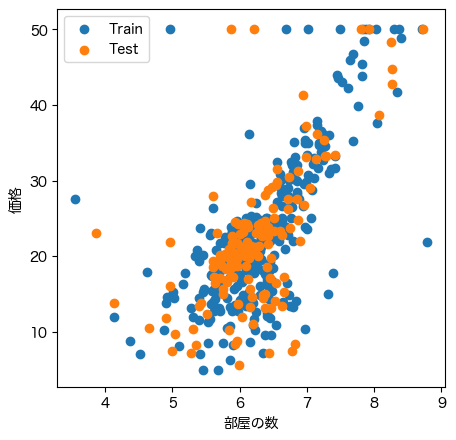

傾き a = 9.311328
切片 b = -35.994349


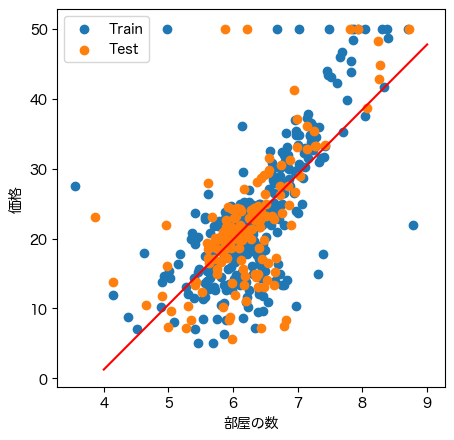

MAE for train data= 4.429673212104038
MAE for test data= 4.470784290506162


In [3]:
#単回帰モデル
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams


rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'Noto Sans CJK JP']



# 説明変数を「RM:部屋の数」, 目的変数を「MEDV:価格」としてデータを取り出す
x = df["RM"]
y = df["MEDV"]
# 列ベクトルに変換
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)


#データセットを学習データと評価データに分ける
#全体の30%をテストデータにする
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#線形回帰モデル
model = LinearRegression()
 
# モデルの学習
model.fit(x_train, y_train)

#学習データをプロット
fig = plt.figure(figsize=(5,5),dpi=100)
plt.xlabel('部屋の数')
plt.ylabel('価格')
plt.scatter(x_train,y_train,label="Train")
plt.scatter(x_test,y_test,label="Test")
plt.legend()
plt.show()


# 係数の確認
a = model.coef_[0,0]
b = model.intercept_[0]
print("傾き a = %f" % a)
print("切片 b = %f" % b)


#データの上に、求まった単回帰モデルの直線を描画
fig = plt.figure(figsize=(5,5),dpi=100)
plt.xlabel('部屋の数')
plt.ylabel('価格')
plt.scatter(x_train,y_train,label="Train")
plt.scatter(x_test,y_test,label="Test")
plt.plot([4,9],[4*a+b,9*a+b],color = "red")
plt.legend()
plt.show()

#学習データに対するMAE
y_pred = model.predict(x_train)
mae = mean_absolute_error(y_train, y_pred)
print("MAE for train data=",mae)

#評価データに対するMAE
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE for test data=",mae)


In [ ]:
import seaborn as sns

corr_matrix = df.corr()

fig = plt.figure(figsize=(5,5),dpi=150)
sns.heatmap(corr_matrix,
            square=True,
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values,
           cmap='bwr', annot=True)

,Name,Coefficients,Abs_Coefficients
12,LSTAT,-3.440498,3.440498
7,DIS,-3.097665,3.097665
5,RM,2.705270,2.705270
10,PTRATIO,-2.261105,2.261105
8,RAD,2.096900,2.096900
9,TAX,-1.886063,1.886063
4,NOX,-1.873691,1.873691
1,ZN,1.050280,1.050280
0,CRIM,-1.011901,1.011901
3,CHAS,0.618962,0.618962


MAE for train data= 3.1036061039080045
MAE for test data= 3.6099040603818127


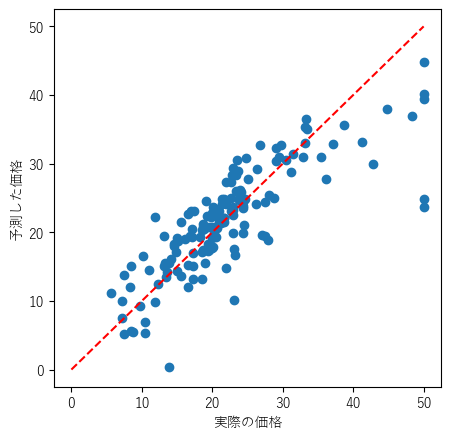

In [141]:
#重回帰モデル
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import ticker

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'Noto Sans CJK JP']

# 説明変数は「MEDV:価格」以外全て, 目的変数を「MEDV:価格」としてデータを取り出す
x = df.drop('MEDV', axis = 1)
y = df["MEDV"].values

#データセットを学習データと評価データに分ける
#全体の30%をテストデータにする
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)

#単回帰モデル
model = LinearRegression()
 
# モデルの学習
model.fit(x_train_std, y_train)



# 標準偏回帰係数
#標準偏回帰係数の大きさ（絶対値）順に並び替えて確認
display(pd.DataFrame({"Name":x.columns,"Coefficients":model.coef_,"Abs_Coefficients":np.abs(model.coef_)}).sort_values(by='Abs_Coefficients', ascending=False))

       
#学習データに対するMAE
y_pred = model.predict(x_train_std)
mae = mean_absolute_error(y_train, y_pred)
print("MAE for train data=",mae)

#評価データに対するMAE
x_test_std = sc.transform(x_test) #評価データの標準化
y_pred = model.predict(x_test_std)
mae = mean_absolute_error(y_test, y_pred)
print("MAE for test data=",mae)


#実際の価格と予測した価格をプロット
fig = plt.figure(figsize=(5,5),dpi=100)
plt.xlabel('実際の価格')
plt.ylabel('予測した価格')
plt.scatter(y_test,y_pred)
plt.plot([0,50],[0,50],color="red",ls="--")
plt.show()




[[-22.73286833   2.48641259]]


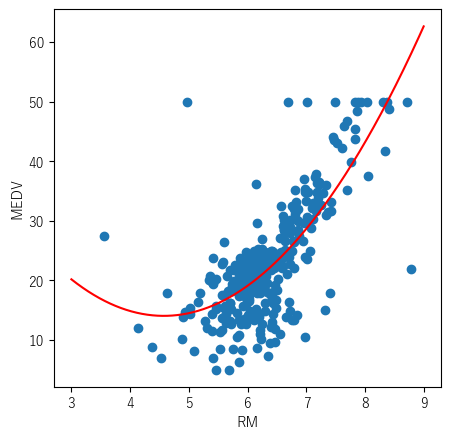

MAE for train data= 4.174372276917966
MAE for test data= 4.321863297181847


In [160]:
#多項式回帰
from sklearn.preprocessing import PolynomialFeatures


rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'Noto Sans CJK JP']



# 説明変数を「RM:部屋の数」, 目的変数を「MEDV:価格」としてデータを取り出す
x = df["RM"]
y = df["MEDV"]
# 列ベクトルに変換
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)

#データセットを学習データと評価データに分ける
#全体の30%をテストデータにする
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


#degreeで次数を指定
pf = PolynomialFeatures(degree=2, include_bias = False)
#説明変数を指定した次数分増やす
x_train_poly = pf.fit_transform(x_train)

#回帰モデル
model = LinearRegression()
 
# モデルの学習
model.fit(x_train_poly, y_train)

print(model.coef_)


#訓練した回帰線を描くための処理===
line = np.linspace(3,9,1000,endpoint=False).reshape(-1,1)
line_niji = pf.transform(line)

fig = plt.figure(figsize=(5,5),dpi=100)
plt.scatter(x_train,y_train,label="Train")
plt.plot(line, model.predict(line_niji), color='red' )
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.show()


#学習データに対するMAE
y_pred = model.predict(x_train_poly)
mae = mean_absolute_error(y_train, y_pred)
print("MAE for train data=",mae)

#評価データに対するMAE
x_test_poly = pf.transform(x_test)
y_pred = model.predict(x_test_poly)
mae = mean_absolute_error(y_test, y_pred)
print("MAE for test data=",mae)





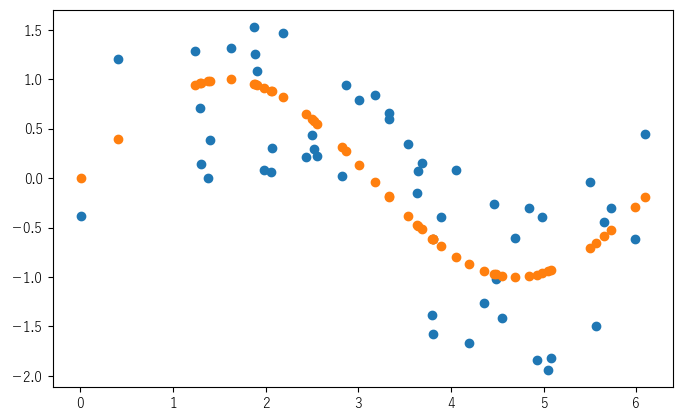

In [357]:
#sin関数をベースにノイズをのせたデータでの多項式回帰
from sklearn.preprocessing import PolynomialFeatures
import math
import random
import numpy as np
import matplotlib.pyplot as plt

xList = []
for i in range(0,51):
    xList.append(random.random()*math.pi*2)

yList_true = []
yList = []
for x in xList:
    yList.append(math.sin(x)+(random.random()*2.0-1.0))
    yList_true.append(math.sin(x))

fig = plt.figure(figsize=(8,5),dpi=100)
plt.scatter(xList,yList)
plt.scatter(xList,yList_true)
plt.show()



[[-0.3304557]]


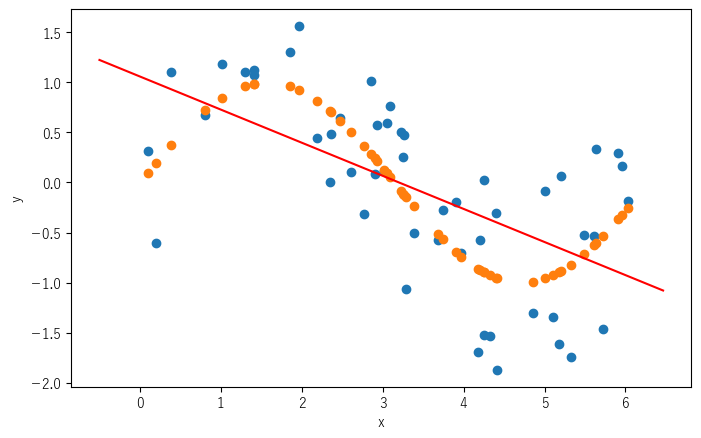

In [356]:
# sin関数をベースにノイズをのせたデータでの多項式回帰
#degreeで次数を指定
pf = PolynomialFeatures(degree=1, include_bias = False)
#説明変数を指定した次数分増やす
x_train_poly = pf.fit_transform(np.array([xList]).T)


#回帰モデル
model = LinearRegression()
 
# モデルの学習
model.fit(x_train_poly, np.array([yList]).T)

print(model.coef_)

#訓練した回帰線を描くための処理===
line = np.linspace(-0.5,6.5,200,endpoint=False).reshape(-1,1)
line_poly = pf.transform(line)

fig = plt.figure(figsize=(8,5),dpi=100)
plt.scatter(xList,yList,label="Train")
plt.scatter(xList,yList_true,label="True")
plt.plot(line, model.predict(line_poly), color='red' )
plt.xlabel("x")
plt.ylabel("y")
plt.show()


C:\Users\kkita\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.095825251703134, tolerance: 0.004065062260414954
  positive)


[[-8.31674045e-01  7.56822894e+00 -9.93706291e+00  5.89245694e+00
  -1.89064682e+00  3.37330567e-01 -3.14240287e-02  1.19204521e-03]]


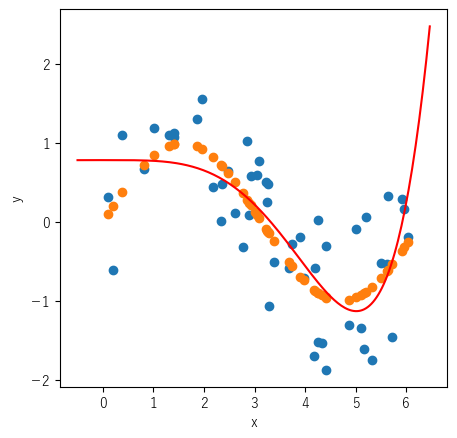

In [350]:
#ラッソ回帰
from sklearn.linear_model import Lasso

pf = PolynomialFeatures(degree=8, include_bias = False)
#説明変数を指定した次数分増やす
x_train_poly = pf.fit_transform(np.array([xList]).T)

reg= Lasso(alpha=1.0)  
reg.fit(x_train_poly, np.array([yList]).T)

print(model.coef_)

#訓練した回帰線を描くための処理===
line = np.linspace(-0.5,6.5,200,endpoint=False).reshape(-1,1)
line_poly = pf.transform(line)

fig = plt.figure(figsize=(5,5),dpi=100)
plt.scatter(xList,yList,label="Train")
plt.scatter(xList,yList_true,label="True")
plt.plot(line, reg.predict(line_poly), color='red' )
plt.xlabel("x")
plt.ylabel("y")
plt.show()


[[-8.31674045e-01  7.56822894e+00 -9.93706291e+00  5.89245694e+00
  -1.89064682e+00  3.37330567e-01 -3.14240287e-02  1.19204521e-03]]


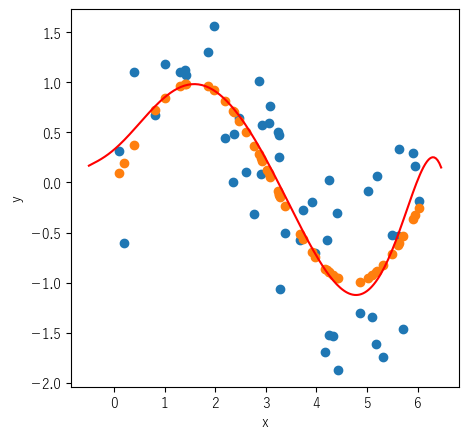

In [352]:
#リッジ回帰
from sklearn.linear_model import Ridge

pf = PolynomialFeatures(degree=8, include_bias = False)
#説明変数を指定した次数分増やす
x_train_poly = pf.fit_transform(np.array([xList]).T)

reg= Ridge(alpha=1.0)  
reg.fit(x_train_poly, np.array([yList]).T)

print(model.coef_)

#訓練した回帰線を描くための処理===
line = np.linspace(-0.5,6.5,200,endpoint=False).reshape(-1,1)
line_poly = pf.transform(line)

fig = plt.figure(figsize=(5,5),dpi=100)
plt.scatter(xList,yList,label="Train")
plt.scatter(xList,yList_true,label="True")
plt.plot(line, reg.predict(line_poly), color='red' )
plt.xlabel("x")
plt.ylabel("y")
plt.show()

C:\Users\kkita\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.01370094140367, tolerance: 0.004065062260414954
  positive)


[[-8.31674045e-01  7.56822894e+00 -9.93706291e+00  5.89245694e+00
  -1.89064682e+00  3.37330567e-01 -3.14240287e-02  1.19204521e-03]]


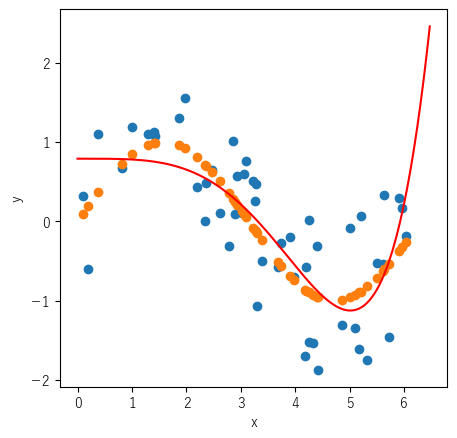

In [355]:
#ElasticNet

from sklearn.linear_model import ElasticNet


pf = PolynomialFeatures(degree=8, include_bias = False)
#説明変数を指定した次数分増やす
x_train_poly = pf.fit_transform(np.array([xList]).T)

reg= ElasticNet(alpha=1.0, l1_ratio=0.5)  
reg.fit(x_train_poly, np.array([yList]).T)

print(model.coef_)

#訓練した回帰線を描くための処理===
line = np.linspace(0,6.5,200,endpoint=False).reshape(-1,1)
line_poly = pf.transform(line)

fig = plt.figure(figsize=(5,5),dpi=100)
plt.scatter(xList,yList,label="Train")
plt.scatter(xList,yList_true,label="True")
plt.plot(line, reg.predict(line_poly), color='red' )
plt.xlabel("x")
plt.ylabel("y")
plt.show()
